# Bathymetry

This is a simple example to show how to plot the model bathymetry. It uses cartopy, and the recently developed 0.1° topography.

In [10]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cft
import cartopy.mpl.ticker as cticker
import cmocean as cm # beautiful colour maps
import IPython.display

In [11]:
# importing the latest bathymetry
file = '/g/data3/hh5/tmp/cosima/bathymetry/topog_latest.nc'
data = nc.Dataset(file)
depth = data.variables['depth'][:,:]

# importing longitude and latitude values
file2 = '/g/data3/hh5/tmp/cosima/bathymetry/ocean_hgrid.nc'
data2 = nc.Dataset(file2)
lons = data2.variables['x'][::2,::2]
lats = data2.variables['y'][::2,::2]

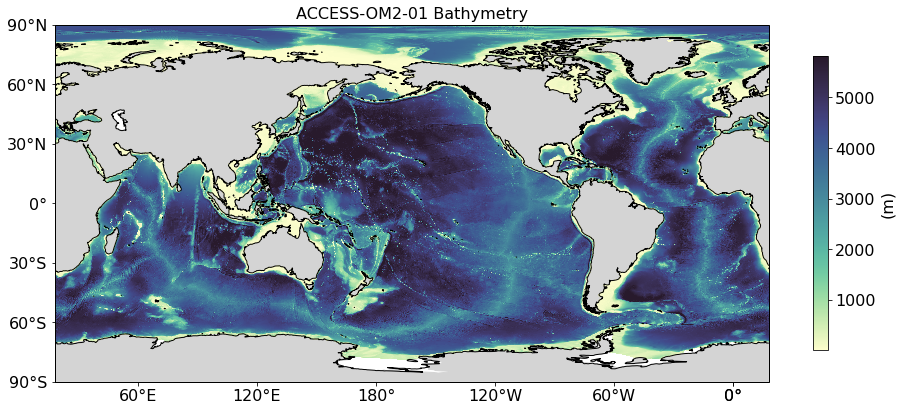

In [12]:
plt.figure(figsize=(16,9))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=198)) # Pacific-centered
ax.coastlines(resolution='50m') # add coastlines
ax.add_feature(cft.LAND,color=[.83, .83, .83]) # grey land colour
plt.pcolormesh(lons, lats, depth, cmap=cm.cm.deep, transform=ccrs.PlateCarree()) 
plt.colorbar(shrink=0.6).set_label('(m)', fontsize=16)
plt.title('ACCESS-OM2-01 Bathymetry', fontsize=16)

# set colour bar tick size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

# set custom longitude and latitude values with correct formatting
ax.set_xticks([0,60,120,180,240,300,360], crs=ccrs.PlateCarree())   
ax.set_yticks([-90,-60,-30,0,30,60,90], crs=ccrs.PlateCarree())
ax.yaxis.tick_left()
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter) # set format of x-axis
ax.yaxis.set_major_formatter(lat_formatter) # "       "       "
ax.xaxis.label.set_visible(False) # only labels on left & bottom
ax.yaxis.label.set_visible(False)
# set longitude and latitude tick size
ax.tick_params(labelsize=16)   
    
    
plt.savefig('../../bathymetry', dpi=300, facecolor='w', 
            edgecolor='w', orientation='landscape', papertype=None, 
            format=None, transparent=False, bbox_inches=None, 
            pad_inches=0.1, metadata=None)

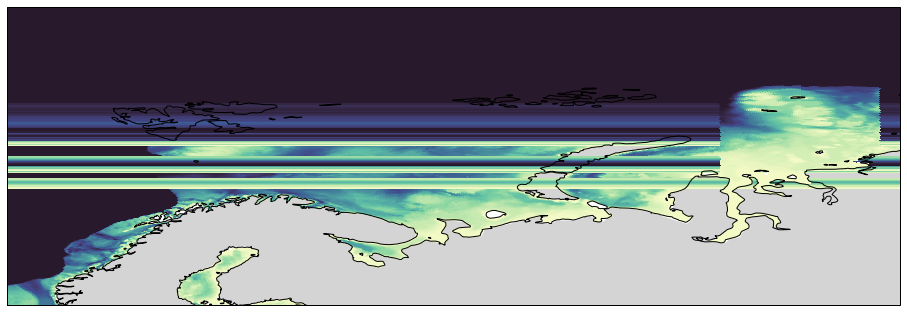

In [13]:
plt.figure(figsize=(16,9))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=72)) 
ax.coastlines(resolution='50m') # add coastlines
ax.set_extent([0, 90, 60, 90])
ax.add_feature(cft.LAND,color=[.83, .83, .83]) # grey land colour
plt.pcolormesh(lons, lats, depth, cmap=cm.cm.deep, vmin=0, vmax=500,transform=ccrs.PlateCarree()) 

# pcolormesh in cartopy seems to encounter an issue here (especially in the tripolar region). This can be
# circumwented by changing the central_longitude parameter

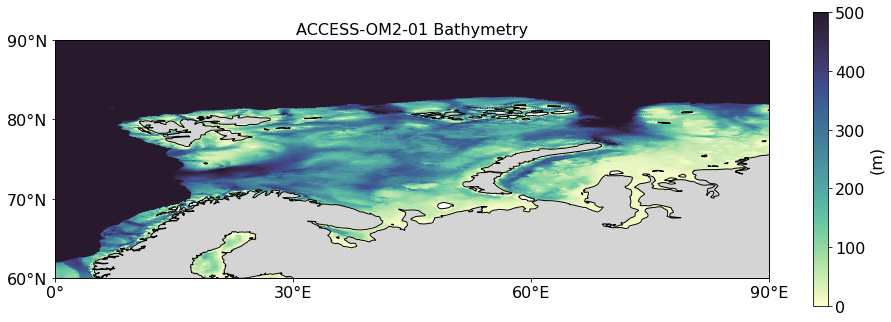

In [14]:
plt.figure(figsize=(16,9))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines(resolution='50m') # add coastlines
ax.set_extent([0, 90, 60, 90])
ax.add_feature(cft.LAND,color=[.83, .83, .83]) # grey land colour
plt.pcolormesh(lons, lats, depth, cmap=cm.cm.deep, vmin=0, vmax=500,transform=ccrs.PlateCarree()) 
plt.colorbar(shrink=0.6).set_label('(m)', fontsize=16)
plt.title('ACCESS-OM2-01 Bathymetry', fontsize=16)

# set colour bar tick size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

# set custom longitude and latitude values with correct formatting
ax.set_xticks([0,30,60,90], crs=ccrs.PlateCarree())   
ax.set_yticks([60,70, 80,90], crs=ccrs.PlateCarree())
ax.yaxis.tick_left()
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter) # set format of x-axis
ax.yaxis.set_major_formatter(lat_formatter) # "       "       "
ax.xaxis.label.set_visible(False) # only labels on left & bottom
ax.yaxis.label.set_visible(False)
# set longitude and latitude tick size
ax.tick_params(labelsize=16)   
    
    
plt.savefig('../../bathymetry_zoom', dpi=300, facecolor='w', 
            edgecolor='w', orientation='landscape', papertype=None, 
            format=None, transparent=False, bbox_inches=None, 
            pad_inches=0.1, metadata=None)